In [13]:
import os 
import numpy as np
os.environ["KAGGLE_USERNAME"] = "danielgarciafallas"
os.environ["KAGGLE_KEY"] = "b05d09bcae866a8243ef73f9c47ea4dd"

In [14]:
base_dir = os.path.dirname(os.getcwd())
covid_images_path = base_dir+"/COVID-19_Radiography_Dataset/COVID/images"
normal_images_path = base_dir+"/COVID-19_Radiography_Dataset/Normal/images"
lung_opacity_images_path = base_dir+"/COVID-19_Radiography_Dataset/Lung_Opacity/images"
viral_pneumonia_images_path = base_dir+"/COVID-19_Radiography_Dataset/Viral Pneumonia/images"

(299, 299, 3)


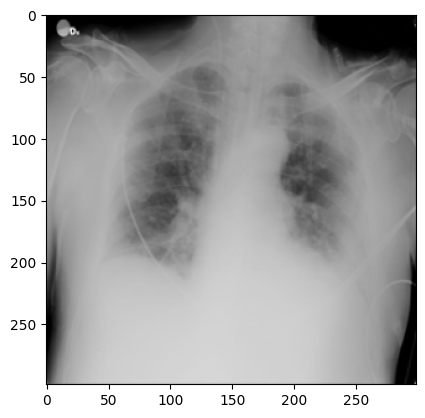

In [15]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread(covid_images_path+"/COVID-1.png")
plt.imshow(img)
print(img.shape)

(199, 199, 3)


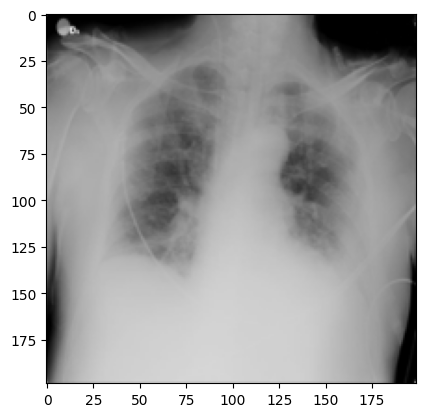

In [16]:
img = cv2.imread(covid_images_path+"/COVID-1.png")
img_resized = cv2.resize(img,(199,199))
plt.imshow(img_resized)
print(img_resized.shape)

### Feature Engineering
* resize (150,150)
* normalization data/255.0


In [17]:
def loadImages(path, urls, target, size):
    images = []
    labels = []
    # for i in range(len(urls))
    for i in range(size):
        img_path = path+"/"+urls[i]
        # normalization
        img = cv2.imread(img_path) / 255.0
        # to rezise images
        img = cv2.resize(img,(199,199))
        if img.shape != (199, 199):
            img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
        images.append(img)
        labels.append(target)
    
    return np.asarray(images),labels

### Loading data

##### Target Labels
* 0 : normal
* 1 : covid
* 2 : lung opacity
* 3 : viral pneumonia

In [18]:
print(len((os.listdir(normal_images_path))))
print(len((os.listdir(covid_images_path))))
print(len((os.listdir(lung_opacity_images_path))))
print(len((os.listdir(viral_pneumonia_images_path))))

10192
3616
6012
1345


In [7]:
normalImages,normalTargets = loadImages(normal_images_path,os.listdir(normal_images_path),0,2500)
covidImages,covidTargets = loadImages(covid_images_path,os.listdir(covid_images_path),1,2500)
lungImages,lungTargets = loadImages(lung_opacity_images_path,os.listdir(lung_opacity_images_path),2,2500)
viralImages,viralTargets = loadImages(viral_pneumonia_images_path,os.listdir(viral_pneumonia_images_path),3,1345)

In [8]:
print(normalImages.shape)
print(covidImages.shape)
print(lungImages.shape)
print(viralImages.shape)

(2500, 299, 299)
(2500, 299, 299)
(3000, 299, 299)
(1345, 299, 299)


### Creating df

In [9]:
data_Set = np.r_[normalImages,covidImages,lungImages,viralImages]
targets = np.r_[normalTargets,covidTargets,lungTargets,viralTargets]

### Dividing the train and test data
##### We choose
* 25% testing
* 75% training

In [10]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(data_Set, targets, test_size=0.25,shuffle=True,stratify=targets)

# data_Set = torch.tensor(data_Set)
# X_train = torch.tensor(X_train)
# X_test = torch.tensor(X_test)
# y_train = torch.tensor(y_train)
# y_test = torch.tensor(y_test)


In [11]:
y_train = to_categorical(y_train.astype(int),num_classes=4)
y_test = to_categorical(y_test.astype(int),num_classes=4)

In [12]:
mlp = Sequential()
mlp.add(Flatten(input_shape = (299,299,1)))

mlp.add(Dense(64,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(32,activation="relu"))
mlp.add(Dropout(0.2))

mlp.add(Dense(4,activation="softmax"))

optimizer = Adam(learning_rate=0.01)
mlp.compile(loss="categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])

mlp.fit(X_train,y_train,batch_size=64,epochs=15,verbose=1)

Epoch 1/15
110/110 [==============================] - 8s 31ms/step - loss: 19.0496 - accuracy: 0.3109
Epoch 2/15
110/110 [==============================] - 3s 30ms/step - loss: 1.4186 - accuracy: 0.3205
Epoch 3/15
110/110 [==============================] - 3s 30ms/step - loss: 1.4292 - accuracy: 0.3218
Epoch 4/15
110/110 [==============================] - 3s 30ms/step - loss: 1.3801 - accuracy: 0.3211
Epoch 5/15
110/110 [==============================] - 3s 31ms/step - loss: 1.3924 - accuracy: 0.3211
Epoch 6/15
110/110 [==============================] - 3s 30ms/step - loss: 1.3736 - accuracy: 0.3209
Epoch 7/15
110/110 [==============================] - 3s 29ms/step - loss: 1.3624 - accuracy: 0.3203
Epoch 8/15
110/110 [==============================] - 3s 30ms/step - loss: 1.3568 - accuracy: 0.3243
Epoch 9/15
110/110 [==============================] - 3s 29ms/step - loss: 1.3670 - accuracy: 0.3211
Epoch 10/15
110/110 [==============================] - 3s 29ms/step - loss: 1.3616 - accur

### Creating a MLP model with pytorch

In [55]:
# class MLP(nn.Module):
#   '''
#     Multilayer Perceptron.
#   '''
#   def __init__(self):
#     super().__init__()
#     self.layers = nn.Sequential(
#       nn.Flatten(),
#       nn.Linear(150 * 150 * 3, 512),
#       nn.ReLU(),
#       nn.Linear(512, 256),
#       nn.ReLU(),
#       nn.Linear(256, 128),
#       nn.ReLU(),
#       nn.Linear(128, 4)
#     )


#   def forward(self, x):
#     '''Forward pass'''
#     return self.layers(x)

In [57]:
# mlp = MLP()
# loss_function = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01)
# trainloader = torch.utils.data.DataLoader(data_Set, batch_size=10, shuffle=True, num_workers=1)
# # Run the training loop
# for epoch in range(0, 5): # 5 epochs at maximum
  
#   # Print epoch
#   print(f'Starting epoch {epoch+1}')
  
#   # Set current loss value
#   current_loss = 0.0
  
#   # Iterate over the DataLoader for training data
#   for i, data in enumerate(trainloader, 0):
    
#     # Get inputs
#     inputs, targets = data
    
#     # Zero the gradients
#     optimizer.zero_grad()
    
#     # Perform forward pass
#     outputs = mlp(inputs)
    
#     # Compute loss
#     loss = loss_function(outputs, targets)
    
#     # Perform backward pass
#     loss.backward()
    
#     # Perform optimization
#     optimizer.step()
    
#     # Print statistics
#     current_loss += loss.item()
#     if i % 500 == 499:
#         print('Loss after mini-batch %5d: %.3f' %
#               (i + 1, current_loss / 500))
#         current_loss = 0.0

# # Process is complete.
# print('Training process has finished.')

Starting epoch 1


RuntimeError: mat1 and mat2 must have the same dtype

In [27]:
# import torch
# import torch.nn as nn

# class MLP(nn.Module):
#     def __init__(self, input_dim, hidden_dims, output_dim, activations):
#         super(MLP, self).__init__()
#         self.layers = nn.ModuleList()
#         for i in range(len(hidden_dims)):
#             if i == 0:
#                 self.layers.append(nn.Linear(input_dim, hidden_dims[i]))
#             else:
#                 self.layers.append(nn.Linear(hidden_dims[i-1], hidden_dims[i]))
#             self.layers.append(activations[i])
#         self.layers.append(nn.Linear(hidden_dims[-1], output_dim))

#     def forward(self, x):
#         for layer in self.layers:
#             x = layer(x)
#         x = self.softmax(x)  # Debido a la clasificacion
#         return x

In [44]:
# # Dimensiones de entrada, ocultas y salida
# input_dim = normalImages.shape[1]*normalImages.shape[2]
# print(input_dim)
# hidden_dims = [input_dim, 128, 64]  # Ejemplo de 3 capas ocultas
# output_dim = 4

# # Funciones de activación correspondientes a cada capa
# activations = [nn.ReLU(), nn.ReLU(), nn.Sigmoid()]

# # Crear instancia del MLP
# mlp = MLP(input_dim, hidden_dims, output_dim, activations)

# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(mlp.parameters(), lr=0.01)

22500


In [45]:
# num_epochs = 50

# for epoch in range(num_epochs):
#     # Paso de entrenamiento
#     mlp.train()
#     optimizer.zero_grad()
#     outputs = mlp(X_train)
#     loss = criterion(outputs, y_train)
#     loss.backward()
#     optimizer.step()

#     # Paso de evaluación
#     mlp.eval()
#     with torch.no_grad():
#         test_outputs = mlp(X_test)
#         _, predicted = torch.max(test_outputs, 1)
#         accuracy = (predicted == y_test).sum().item() / y_test.size(0)

#     # Imprimir métricas de entrenamiento
#     print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (90787500x3 and 22500x22500)